<a href="https://colab.research.google.com/github/HuyKhoi-code/CS114.K21/blob/master/gender_detect_using_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cvlib

     |████████████████████████████████| 10.1MB 2.5MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.5-cp36-none-any.whl size=10044204 sha256=ddbe172706b345be99b7dd3d5b8f72b28e2f1878f9ec055357ec75e8a5d00dd6
  Stored in directory: /root/.cache/pip/wheels/6a/cb/43/ba188c823836640d8f22ee1f6ff792a0c83a8b66eabf52b219
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12074 sha256=31a241f2daa4dcba8f4d6c6d4ecacc58567a6cea390c783118641b5e6e71dc6a
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


In [ ]:
import cv2
import os

In [ ]:
from google.colab import files
files.upload()

Saving 103488870_3501023739925425_3721017189503802086_n.jpg to 103488870_3501023739925425_3721017189503802086_n.jpg


{'103488870_3501023739925425_3721017189503802086_n.jpg': b'\xff\xd8\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

https://billetto.co.uk/blog/wp-content/uploads/2019/07/nicholas-green-nPz8akkUmDI-unsplash-e1563462058230.jpg
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  140k  100  140k    0     0  81182      0  0:00:01  0:00:01 --:--:-- 81136


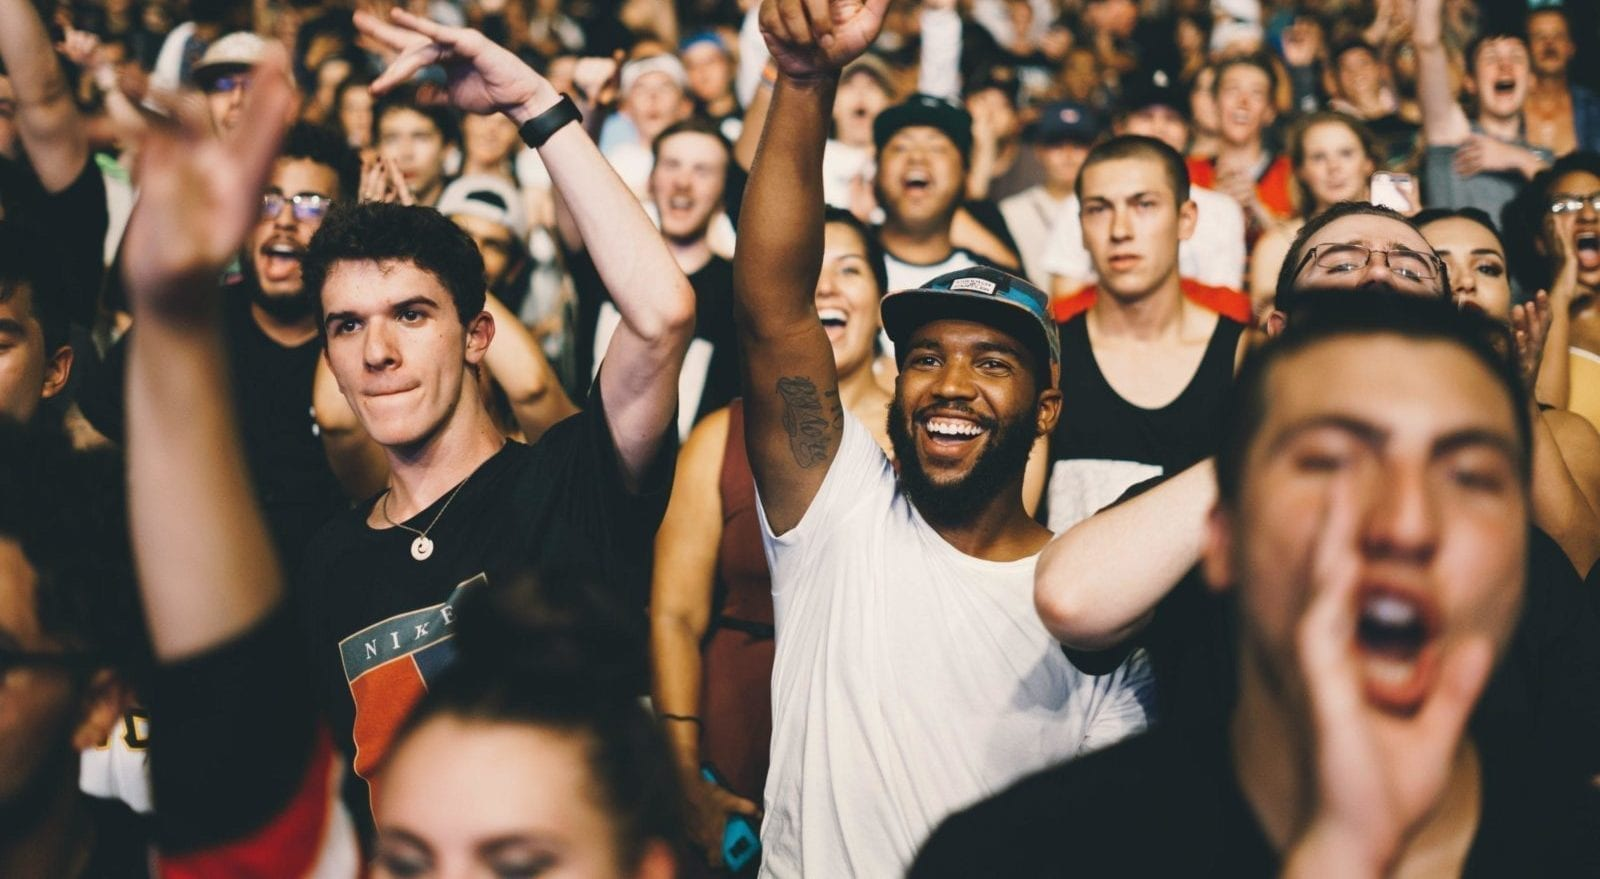

nicholas-green-nPz8akkUmDI-unsplash-e1563462058230.jpg


In [ ]:
def download_view(img_url):
  img_file = os.path.basename(img_url)
  !curl -o $img_file $img_url
  img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  return img_file
img_url = "https://billetto.co.uk/blog/wp-content/uploads/2019/07/nicholas-green-nPz8akkUmDI-unsplash-e1563462058230.jpg" #@param {type:"string"}

print(img_url)
img_file = download_view(img_url)
print(img_file)

In [ ]:
img = cv2.imread("/content/nicholas-green-nPz8akkUmDI-unsplash-e1563462058230.jpg")
import cvlib as cv
faces, confidences = cv.detect_face(img) 

In [ ]:
import numpy as np

In [ ]:
padding = 20
for f in faces:

    (startX,startY) = max(0, f[0]-padding), max(0, f[1]-padding)
    (endX,endY) = min(img.shape[1]-1, f[2]+padding), min(img.shape[0]-1, f[3]+padding)
    
    # draw rectangle over face
    cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 2)

    face_crop = np.copy(img[startY:endY, startX:endX])

    # apply gender detection
    (label, confidence) = cv.detect_gender(face_crop)

    print(confidence)
    print(label)

    idx = np.argmax(confidence)
    label = label[idx]

    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(img, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

45654016/45649168 [==============================] - 4s 0us/step
[INFO] Initializing gender detection model ..
[9.999902e-01 9.756691e-06]
['male', 'female']
[0.7914016  0.20859839]
['male', 'female']
[9.9986255e-01 1.3738664e-04]
['male', 'female']
[0.02352493 0.97647506]
['male', 'female']
[0.9977502 0.0022498]
['male', 'female']
[9.9999714e-01 2.8320044e-06]
['male', 'female']
[0.02873535 0.97126466]
['male', 'female']


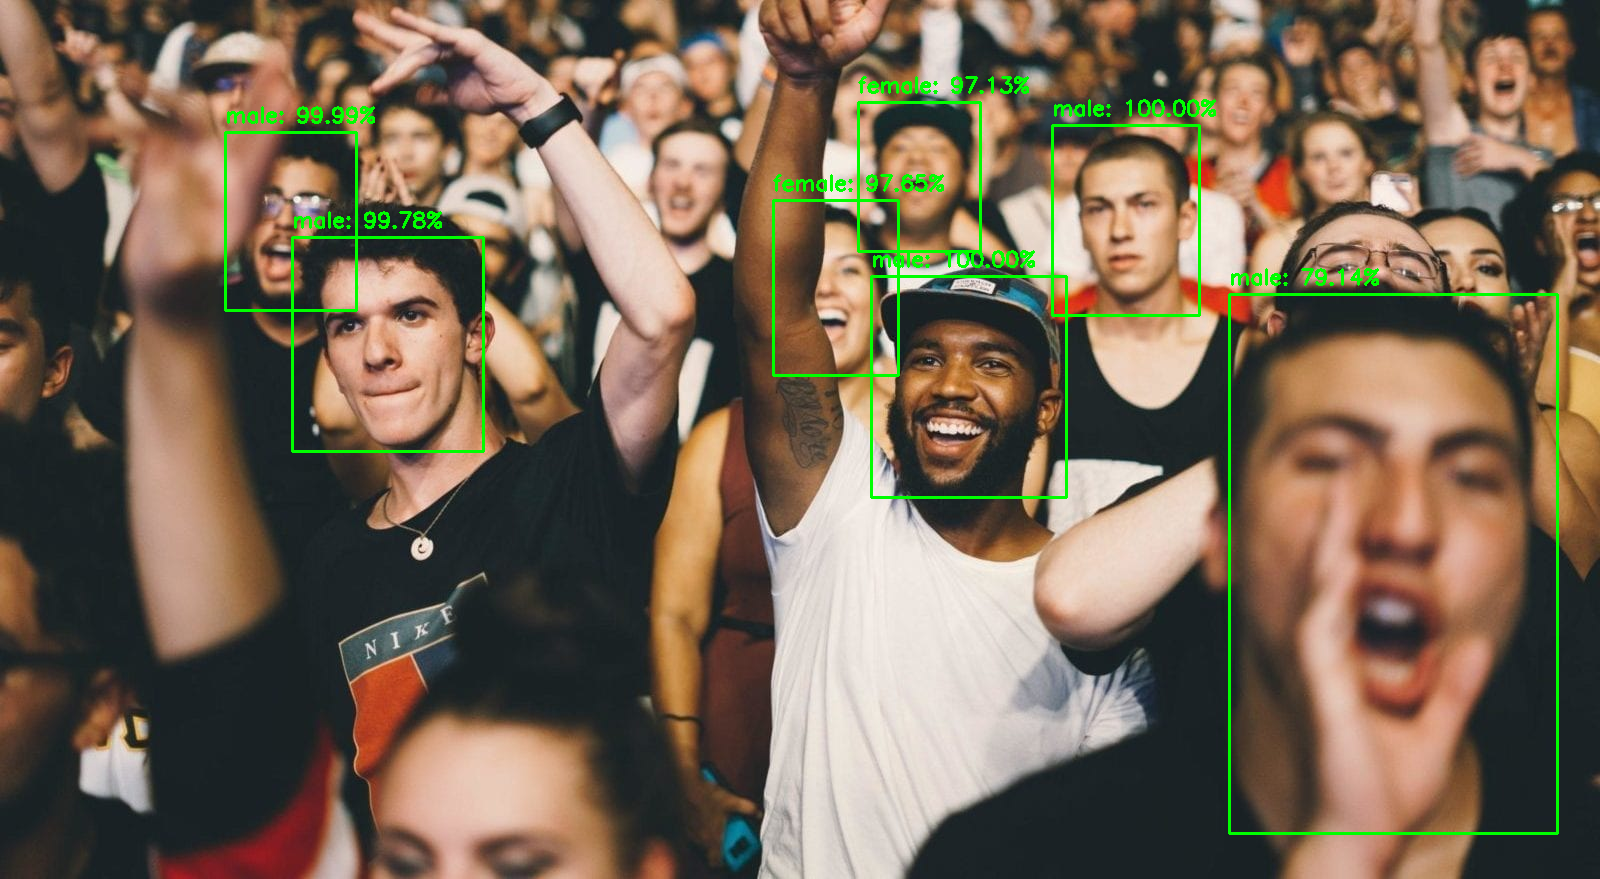

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow( img)